# PROYECTO DE ANÁLISIS DE DATOS

**Identificación de Operadores Ineficaces**

**Servicio de Telefonía Virtual CallMeMaybe**

**Nombre:** Daniel Ramírez Martínez 

**Rol:** Analista de datos 

**Fecha de Entrega:** 4 agosto de 2025

**Herramientas Utilizadas:** Python (Jupyter Notebook), Tableau, Google Drive

**Datasets:** telecom_dataset_us.csv, telecom_clients_us.csv

## Introducción 

CallMeMaybe es un servicio de telefonía virtual que permite a organizaciones gestionar llamadas entrantes y salientes a través de múltiples operadores. Este proyecto busca identificar operadores ineficaces mediante el análisis de tres métricas clave:

1. Tasa de llamadas perdidas

2. Tiempo de espera prolongado

3. Bajo volumen de llamadas salientes (cuando aplica)

El análisis se estructura en dos partes principales:

1. **Jupyter Notebook:** Análisis exploratorio, identificación de operadores y pruebas estadísticas

2. **Tableau Dashboard:** Visualizaciones interactivas para monitoreo continuo

   **Presentación:** Resumen de resultados del analisis de datos 

El objetivo final es proporcionar a los supervisores herramientas basadas en datos para mejorar la eficiencia operativa.

# Parte 1: Análisis en Jupyter Notebook

## 1. Carga de Datos y Preprocesamiento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Cargar datasets
calls_df = pd.read_csv("telecom_dataset_us.csv")
clients_df = pd.read_csv("telecom_clients_us.csv")

# Vista general
print("Llamadas:")
display(calls_df.head())
print("\nClientes:")
display(clients_df.head())

# Info y nulos
print("\nInformación general:")
calls_df.info()
print("\nValores nulos:")
print(calls_df.isnull().sum())


Llamadas:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25



Clientes:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

Valores nulos:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_cal

### Interpretación 


**1. Datos de llamadas**

- **Dirección de llamadas**: La columna `direction` permite distinguir entre llamadas entrantes (`in`) y salientes (`out`), lo que posibilita el análisis del comportamiento de los usuarios por tipo de llamada.

- **Llamadas internas y externas**: La columna `internal` indica si la llamada fue interna. Hay 117 valores nulos, lo que representa aproximadamente el 0.2% del total y puede deberse a errores de captura o a llamadas que no se clasificaron correctamente.

- **Cantidad y duración de llamadas**:
  - `calls_count`: número de llamadas en un solo registro.
  - `call_duration`: duración de una única llamada.
  - `total_call_duration`: duración acumulada cuando hay más de una llamada en el registro.
  - Existen registros con múltiples llamadas (`calls_count > 1`) pero con `call_duration = 0`, lo cual puede indicar llamadas perdidas o sin conexión.

- **Llamadas perdidas**: La variable `is_missed_call` permite analizar cuántas llamadas no fueron atendidas. Esta información es útil para evaluar la eficiencia operativa o el nivel de servicio.

- **ID del operador**: La columna `operator_id` contiene 8,172 valores nulos (alrededor del 15%), lo que puede indicar llamadas no asignadas, fallos en el sistema o llamadas internas sin operador asociado.

**2. Datos de clientes**

- **Plan tarifario**: Todos los clientes listados están en el plan tarifario "A". Esto limita el análisis comparativo entre distintos tipos de planes, pero permite establecer un patrón de uso homogéneo para ese plan.

- **Fecha de inicio del servicio**: La columna `date_start` permite calcular la antigüedad del cliente y analizar su comportamiento desde la fecha de activación.

**3. Información general del DataFrame**

- El conjunto de datos contiene 53,902 registros y 9 columnas.
- Los tipos de datos incluyen enteros, booleanos, flotantes y objetos. La columna `date` debe ser convertida a formato `datetime` para facilitar los análisis temporales.
- Es importante considerar la existencia de valores nulos antes de realizar cualquier análisis estadístico, agregaciones o modelos predictivos.

**4. Conclusiones clave**

- El dataset permite analizar el comportamiento de llamadas por cliente, tipo, duración y frecuencia.
- Se requiere un proceso de limpieza previo, especialmente en las columnas `operator_id` e `internal`, que presentan valores nulos.
- Se pueden construir métricas relevantes como:
  - Promedio de llamadas por día.
  - Porcentaje de llamadas perdidas.
  - Proporción de llamadas internas vs externas.
  - Tiempo total en llamadas por usuario.
- La calidad de los datos es aceptable en general, pero debe mejorarse si se desea aplicar modelos predictivos o realizar análisis más finos por operador o tipo de cliente.


## 2. Limpieza de datos

In [2]:
# Convertir fechas
calls_df["date"] = pd.to_datetime(calls_df["date"])
clients_df["date_start"] = pd.to_datetime(clients_df["date_start"])

# Eliminar duplicados
calls_df.drop_duplicates(inplace=True)
clients_df.drop_duplicates(inplace=True)

# Verificar tipos y nulos de nuevo
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              49002 non-null  int64                                
 1   date                 49002 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            49002 non-null  object                               
 3   internal             48892 non-null  object                               
 4   operator_id          41546 non-null  float64                              
 5   is_missed_call       49002 non-null  bool                                 
 6   calls_count          49002 non-null  int64                                
 7   call_duration        49002 non-null  int64                                
 8   total_call_duration  49002 non-null  int64                                
dtypes: bool

### Calcular proporciones de valores nulos

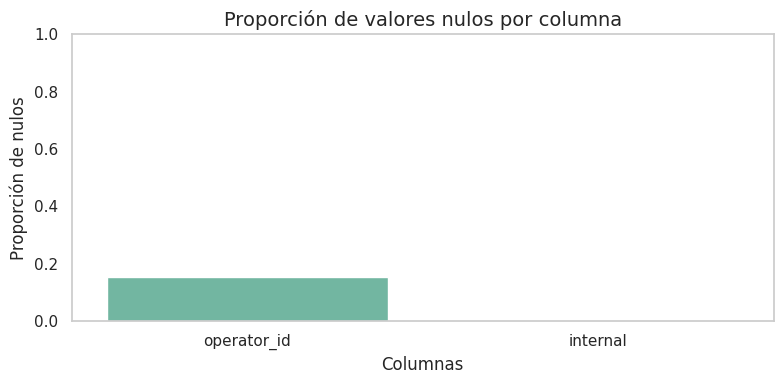

In [3]:
# Calcular proporciones de valores nulos
null_proportion = calls_df.isnull().mean().sort_values(ascending=False)

# Filtrar solo las columnas con valores nulos
null_proportion = null_proportion[null_proportion > 0]

# Gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x=null_proportion.index, y=null_proportion.values, palette="Set2")
plt.title("Proporción de valores nulos por columna", fontsize=14)
plt.ylabel("Proporción de nulos")
plt.xlabel("Columnas")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretación 


**Calidad de datos**

- **Valores nulos**:
  - `internal`: 110 valores nulos (≈0.22%), posiblemente por datos incompletos o llamadas no clasificadas.
  - `operator_id`: 7,456 valores nulos (≈15.2%), lo cual puede indicar llamadas sin asignación de operador, fallos de captura o llamadas internas sin operador asociado.
- La columna `date` ya está en formato `datetime`, lo cual facilita el análisis cronológico.

**Consideraciones para el análisis**

- Es recomendable imputar o excluir los valores nulos en `internal` y `operator_id` según el enfoque del análisis.
- El uso de zona horaria fija debe mantenerse consistente si se combinan datos con otras fuentes temporales.
- Las métricas como duración promedio, proporción de llamadas perdidas o tipo de llamadas pueden calcularse directamente con este formato sin necesidad de transformación adicional.

**Conclusión**

- El DataFrame está bien estructurado y optimizado para análisis exploratorio y visualizaciones.
- La cantidad de datos nulos es manejable y no compromete significativamente la calidad general del dataset.
- El tipo de datos y el formato permiten aplicar directamente técnicas de agregación, filtrado por fecha y visualización temporal.


## 3. Análisis Exploratorio (EDA)

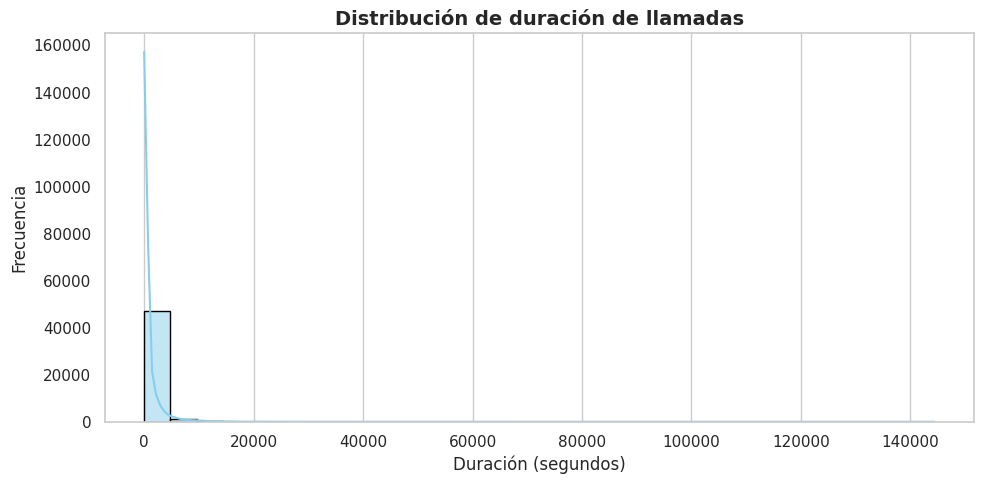

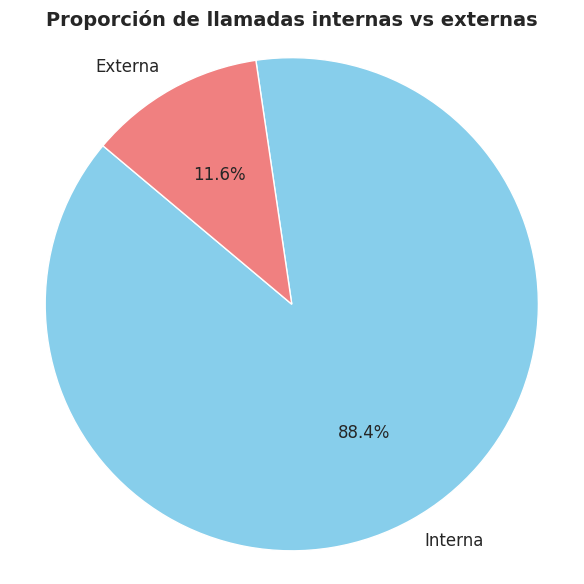

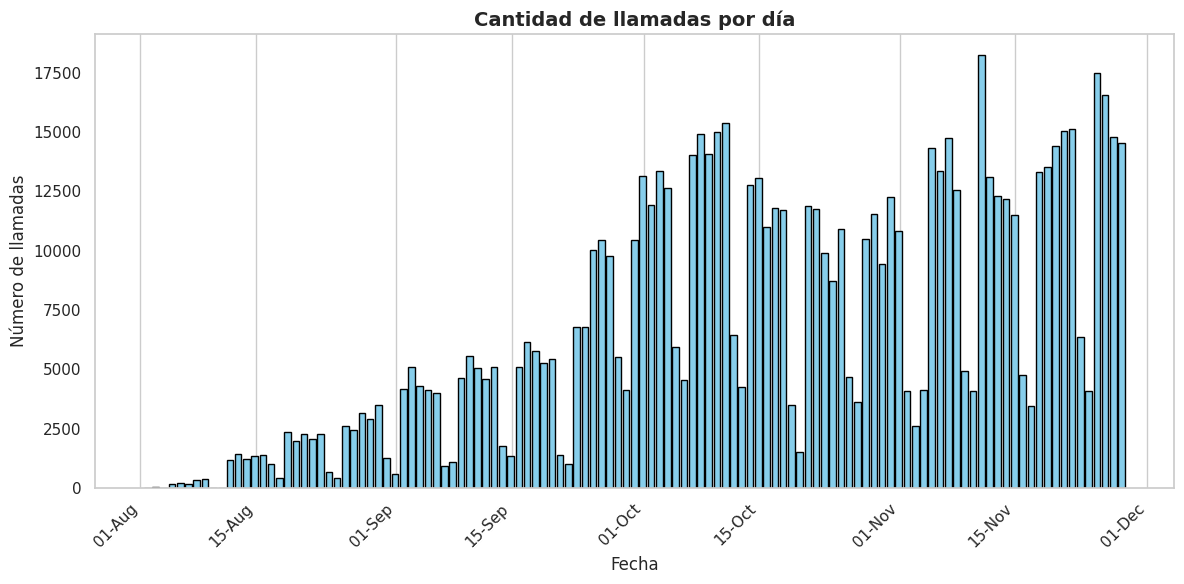

In [4]:
# Distribución de duración de llamadas
plt.figure(figsize=(10, 5))
sns.histplot(calls_df["call_duration"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribución de duración de llamadas", fontsize=14, weight='bold')
plt.xlabel("Duración (segundos)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Guardar imagen
plt.savefig("distribucion_duracion_llamadas.png", dpi=300, bbox_inches='tight')
plt.show()




# Tipo de llamadas: internas vs externas
labels = ["Interna", "Externa"]
sizes = calls_df["internal"].value_counts().sort_index()
colors = ["skyblue", "lightcoral"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Proporción de llamadas internas vs externas", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
# Guardar imagen
plt.savefig("proporcion_llamadas_internas_vs_externas.jpg", dpi=300, bbox_inches='tight')
plt.show()




# Cantidad de llamadas por día
calls_df['date'] = pd.to_datetime(calls_df['date'])  # Asegurar formato datetime
calls_per_day = calls_df.groupby("date")["calls_count"].sum()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(calls_per_day.index, calls_per_day.values, color='skyblue', edgecolor='black')
ax.set_title("Cantidad de llamadas por día", fontsize=14, weight='bold')
ax.set_ylabel("Número de llamadas", fontsize=12)
ax.set_xlabel("Fecha", fontsize=12)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Guardar imagen
plt.savefig("cantidad_llamadas_por_dia.png", dpi=300, bbox_inches='tight')
plt.show()



## 4. Definir criterios de ineficacia


In [5]:
# Operadores con muchas llamadas entrantes perdidas
ineficacia_por_llamadas = calls_df[
    (calls_df["direction"] == "in") & 
    (calls_df["is_missed_call"] == True)
].groupby("operator_id")["calls_count"].sum()

# Operadores con mayor tiempo de espera
calls_df["wait_time"] = calls_df["total_call_duration"] - calls_df["call_duration"]
ineficacia_por_espera = calls_df[calls_df["direction"] == "in"].groupby("operator_id")["wait_time"].mean()

# Operadores con pocas llamadas salientes
llamadas_salientes = calls_df[(calls_df["direction"] == "out")].groupby("operator_id")["calls_count"].sum()

# Unir todo
ineficiencia = pd.DataFrame({
    "llamadas_perdidas": ineficacia_por_llamadas,
    "tiempo_espera_prom": ineficacia_por_espera,
    "llamadas_salientes": llamadas_salientes
}).fillna(0)

ineficiencia["ineficaz"] = (
    (ineficiencia["llamadas_perdidas"] > ineficiencia["llamadas_perdidas"].mean()) &
    (ineficiencia["tiempo_espera_prom"] > ineficiencia["tiempo_espera_prom"].mean()) |
    (ineficiencia["llamadas_salientes"] < ineficiencia["llamadas_salientes"].mean())
)

ineficientes = ineficiencia[ineficiencia["ineficaz"] == True]
ineficientes.head()


,llamadas_perdidas,tiempo_espera_prom,llamadas_salientes,ineficaz
operator_id,,,,
880020.0,0.0,7.714286,38.0,True
880022.0,0.0,14.000000,189.0,True
880240.0,0.0,0.000000,47.0,True
881278.0,0.0,0.000000,20.0,True
882476.0,0.0,31.666667,0.0,True


## 5. Prueba de hipótesis

###  Prueba de hipótesis aplicada

| Elemento                  | Descripción                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| Hipótesis nula (H₀)       | No hay diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces.|
| Hipótesis alternativa (H₁)| Hay una diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces.|
| Tipo de prueba            | t de Student para muestras independientes                                   |
| Variable analizada        | Tiempo de espera promedio                                                   |
| Nivel de significancia    | alpha = 0.05                                                      |



In [6]:
from scipy.stats import ttest_ind

# Separar dos grupos: eficaces vs ineficaces
eficaces = ineficiencia[ineficiencia["ineficaz"] == False]
ineficaces = ineficiencia[ineficiencia["ineficaz"] == True]

# Comparar el tiempo de espera
t_stat, p_value = ttest_ind(
    eficaces["tiempo_espera_prom"],
    ineficaces["tiempo_espera_prom"],
    equal_var=False
)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")



t = -7.09, p = 0.0000


#### Interpretación 



- Dado que el valor **p = 0.0000** es mucho menor que el umbral típico de significancia (alpha = 0.05), **rechazamos la hipótesis nula**.
  
- Esto indica que existe una **diferencia estadísticamente significativa** en el **tiempo de espera promedio** entre los operadores eficaces e ineficaces.
  
- Además, el valor negativo de **t = -7.09** sugiere que, en promedio, los **operadores eficaces tienen un tiempo de espera menor** que los ineficaces.

#### Conclusión 


- Con base en la prueba t de Student (**t = -7.09**, **p < 0.0001**), se concluye que existe una **diferencia estadísticamente significativa** en los **tiempos de espera** entre operadores eficaces e ineficaces.
  
- En particular, los operadores eficaces presentan **menores tiempos de espera promedio**, lo que respalda la hipótesis de que la eficacia está asociada a una **atención más rápida**.


## 6. Identificacion de operadores ineficaces 

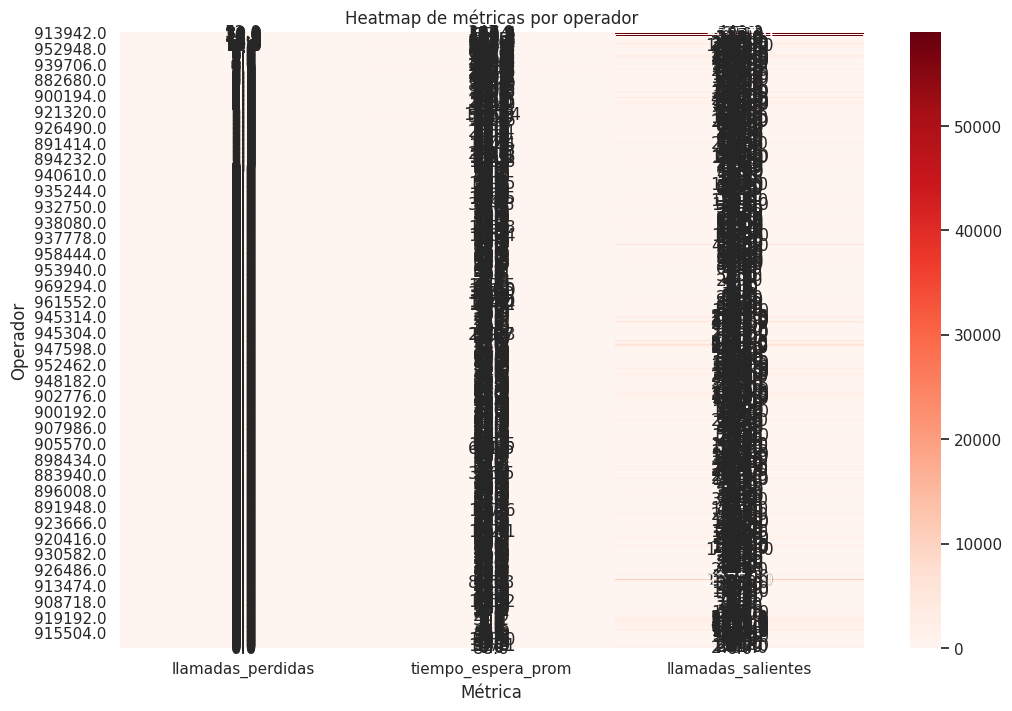

✅ Operadores por encima del percentil 75 en llamadas perdidas:


,llamadas_perdidas,tiempo_espera_prom,llamadas_salientes,percentil_75
operator_id,,,,
913942.0,52.0,347.917647,440.0,True
940588.0,30.0,127.230769,67.0,True
944226.0,30.0,153.580000,109.0,True
885890.0,26.0,120.276596,58977.0,True
937956.0,24.0,17.440678,1.0,True
...,...,...,...,...
918988.0,0.0,13.000000,1.0,True
919126.0,0.0,0.000000,291.0,True
919128.0,0.0,0.000000,388.0,True


In [8]:
# 1. Agrupar llamadas perdidas por operador (solo llamadas entrantes perdidas)
ineficacia_por_llamadas = calls_df[
    (calls_df["direction"] == "in") & 
    (calls_df["is_missed_call"] == True)
].groupby("operator_id")["calls_count"].sum()

# 2. Tiempo de espera promedio por operador
calls_df["wait_time"] = calls_df["total_call_duration"] - calls_df["call_duration"]
ineficacia_por_espera = calls_df[calls_df["direction"] == "in"].groupby("operator_id")["wait_time"].mean()

# 3. Llamadas salientes por operador
llamadas_salientes = calls_df[(calls_df["direction"] == "out")].groupby("operator_id")["calls_count"].sum()

# 4. Unir todas las métricas
ineficiencia = pd.DataFrame({
    "llamadas_perdidas": ineficacia_por_llamadas,
    "tiempo_espera_prom": ineficacia_por_espera,
    "llamadas_salientes": llamadas_salientes
}).fillna(0)

# 5. Clasificar operadores por percentil 75 en llamadas perdidas
percentil_75 = ineficiencia["llamadas_perdidas"].quantile(0.75)
ineficiencia["percentil_75"] = ineficiencia["llamadas_perdidas"] >= percentil_75

# 6. Crear heatmap de métricas por operador
plt.figure(figsize=(12, 8))
sns.heatmap(
    ineficiencia.drop(columns=["percentil_75"]).sort_values("llamadas_perdidas", ascending=False),
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("Heatmap de métricas por operador")
plt.ylabel("Operador")
plt.xlabel("Métrica")
# Guardar imagen
plt.savefig("Heatmap de métricas por operador.png", dpi=300, bbox_inches='tight')
plt.show()

# 7. Mostrar operadores por encima del percentil 75 en llamadas perdidas
print("✅ Operadores por encima del percentil 75 en llamadas perdidas:")
display(ineficiencia[ineficiencia["percentil_75"] == True].sort_values("llamadas_perdidas", ascending=False))

#### Interpretación 

En esta sección se analizan las métricas clave para identificar a los operadores con menor desempeño:

- **Llamadas perdidas**: se evaluaron solo llamadas entrantes no contestadas.
- **Tiempo de espera promedio**: diferencia entre la duración total y el tiempo real de llamada.
- **Llamadas salientes**: se consideró un bajo número como posible falta de proactividad.

Se generó un **heatmap** para visualizar la concentración de valores por operador y se clasificaron aquellos operadores con **más llamadas perdidas que el percentil 75**, lo que indica un desempeño deficiente en comparación con el resto del equipo.

Estos operadores deben ser monitoreados y apoyados con capacitación o redistribución de carga.


###  Los 10 operadores más ineficientes según: llamadas_perdidas, tiempo de espera promedio y llamadas salientes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo los operadores por encima del percentil 75
top_ineficientes = ineficiencia[ineficiencia["percentil_75"] == True].copy()

# Seleccionar los 10 operadores más ineficientes según 'llamadas_perdidas'
top_10 = top_ineficientes.sort_values("llamadas_perdidas", ascending=False).head(10)

# Lista de columnas y colormaps personalizados
metricas = [
    ("llamadas_perdidas", "Reds"),
    ("tiempo_espera_prom", "YlGnBu"),
    ("llamadas_salientes", "BuPu")
]

# Crear figura con 3 subplots en una fila, con espacio extra entre ellos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar cada heatmap en su subplot con barra de color activada
for ax, (columna, cmap) in zip(axes, metricas):
    sns.heatmap(
        top_10[[columna]],
        annot=True,
        fmt=".1f",
        cmap=cmap,
        linewidths=0.5,
        linecolor="gray",
        cbar=True,
        ax=ax
    )
    ax.set_title(columna.replace("_", " ").title(), fontsize=10)
    ax.set_xlabel("Métrica")
    ax.set_ylabel("Operador ID")

# Ajustar espacios manualmente
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.1, wspace=0.4)


# Guardar imagen
plt.savefig("top 10 Heatmap de métricas por operador.png", dpi=300, bbox_inches='tight')
# Mostrar los gráficos
plt.show()


# Parte 2: Análisis en Tableau 

##  Preparar archivos para tableu desde note book:

In [ ]:
# Exportar el DataFrame de llamadas para Tableau
calls_df.to_csv("calls_dataset_for_tableau.csv", index=False)

# Exportar el DataFrame de ineficiencia
ineficiencia.to_csv("ineficiencia_operadores.csv", index=True)


## Descripcion de los archivos: 

In [ ]:
# Cargar los archivos CSV exportados
calls_df = pd.read_csv("calls_dataset_for_tableau.csv")
ineficiencia = pd.read_csv("ineficiencia_operadores.csv")

# Ver columnas de cada DataFrame
print("Campos en 'calls_dataset_for_tableau.csv':")
print(list(calls_df.columns))

print("\nCampos en 'ineficiencia_operadores.csv':")
print(list(ineficiencia.columns))

### calls_dataset_for_tableau.csv

| Campo                | Descripción                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `user_id`            | Identificador del cliente (empresa que usa el servicio).                   |
| `date`               | Fecha en que se registró la estadística de llamadas.                       |
| `direction`          | Dirección de la llamada: `in` (entrante) o `out` (saliente).               |
| `internal`           | Indica si la llamada fue interna (entre operadores del mismo cliente).     |
| `operator_id`        | Identificador único del operador que realizó o recibió la llamada.         |
| `is_missed_call`     | Indica si la llamada fue perdida (`True`) o no (`False`).                  |
| `calls_count`        | Número de llamadas registradas en esa fila (por combinación de variables). |
| `call_duration`      | Duración efectiva de la llamada (en segundos), sin contar espera.          |
| `total_call_duration`| Duración total de la llamada (incluye tiempo de espera).                   |
| `wait_time`          | Tiempo de espera antes de contestar la llamada (en segundos).              |


###  ineficiencia_operadores.csv

| Campo                  | Descripción                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `operator_id`          | Identificador del operador evaluado.                                       |
| `llamadas_perdidas`    | Total de llamadas entrantes perdidas por el operador.                      |
| `tiempo_espera_prom`   | Promedio de espera antes de que el operador atienda llamadas entrantes.    |
| `llamadas_salientes`   | Cantidad de llamadas salientes realizadas por el operador.                 |
| `ineficaz`             | Campo calculado que indica si el operador es ineficaz (`True` o `False`).  |


## Enlace para el Dashboard en Tableau Public 

**Dashboard:** https://public.tableau.com/shared/YJX3GGCYJ?:display_count=n&:origin=viz_share_link

# Parte 3.  Presentación del proyecto

##  Enlace para el PDF en Google Drive

**PDF:** https://drive.google.com/file/d/1BwRooauxf3QZEqm0DfF8xhwDMMdSi_sf/view?usp=sharing